In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
from fbprophet import Prophet
import logging


In [4]:
DataFrame= pd.read_csv('covid_19_data.csv')

DataFrame[DataFrame["Country/Region"]=="US"]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11120,11121,03/23/2020,Grand Princess,US,2020-03-23 23:19:34,28.0,1.0,0.0
11123,11124,03/23/2020,Guam,US,2020-03-23 23:19:34,29.0,1.0,0.0
11150,11151,03/23/2020,Northern Mariana Islands,US,2020-03-23 23:19:34,0.0,0.0,0.0
11155,11156,03/23/2020,Puerto Rico,US,2020-03-23 23:19:34,31.0,2.0,0.0


In [14]:
china_data=DataFrame[DataFrame["Country/Region"]=="Mainland China"]
Italy_data=DataFrame[DataFrame["Country/Region"]=="Italy"]
India_data=DataFrame[DataFrame["Country/Region"]=="India"]
USA_data = DataFrame[DataFrame["Country/Region"]=="US"]
rest_of_world=DataFrame[(DataFrame["Country/Region"]!="Mainland China")&(DataFrame["Country/Region"]!="Italy")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

datewise_India=India_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

datewise_USA = USA_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [19]:
datewise_china["Mortality Rate"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100


In [20]:
datewise_Italy["Mortality Rate"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100


In [21]:
datewise_India["Mortality Rate"]=(datewise_India["Deaths"]/datewise_India["Confirmed"])*100

In [22]:

datewise_USA["Mortality Rate"]=(datewise_USA["Deaths"]/datewise_USA["Confirmed"])*100
datewise_USA["Mortality Rate"]

ObservationDate
01/22/2020    0.000000
01/23/2020    0.000000
01/24/2020    0.000000
01/25/2020    0.000000
01/26/2020    0.000000
                ...   
03/19/2020    1.461988
03/20/2020    1.277420
03/21/2020    1.204252
03/22/2020    1.253155
03/23/2020    1.264112
Name: Mortality Rate, Length: 62, dtype: float64

In [23]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Deaths"],marker="o",label="Confirmed Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

NameError: name 'datewise' is not defined

<Figure size 864x432 with 0 Axes>

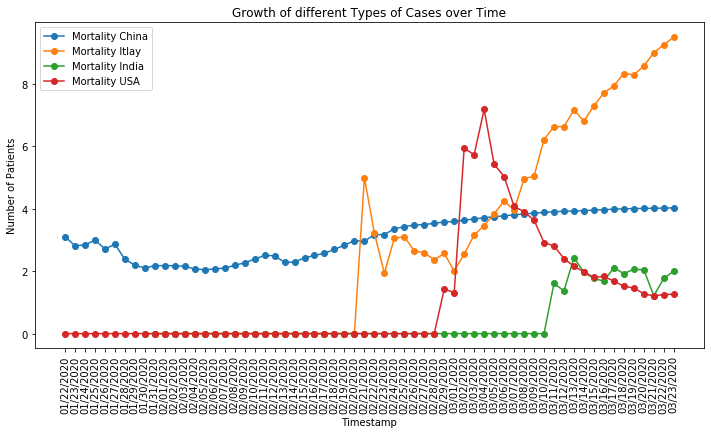

In [27]:
plt.figure(figsize=(12,6))
plt.plot(datewise_china["Mortality Rate"],marker="o",label="Mortality China")
plt.plot(datewise_Italy["Mortality Rate"],marker="o",label="Mortality Itlay")
plt.plot(datewise_India["Mortality Rate"],marker="o",label="Mortality India")
plt.plot(datewise_USA["Mortality Rate"],marker="o",label="Mortality USA")
plt.ylabel("Number of Patients")
plt.xlabel("Timestamp")
plt.xticks(rotation=90)
plt.title("Growth of different Types of Cases over Time")
plt.legend()

In [10]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [16]:
xs = datewise["Confirmed"]
ys = datewise["Mortality Rate"]
#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)